In [135]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [136]:
notebook_path = os.path.abspath("Titanic.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\train.csv")
train = pd.read_csv(path)

In [137]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


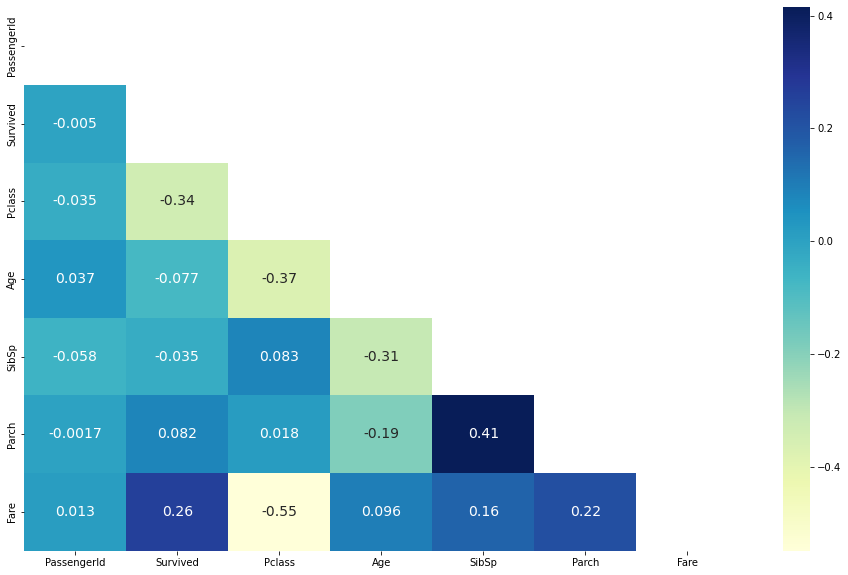

In [138]:
mask = np.zeros_like(train.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [139]:
y = train['Survived']
x = train.drop(['Survived', 'Ticket'], axis=1)
x['FamilySize'] = x['SibSp'] + x['Parch'] + 1
x.drop(['SibSp','Parch'], axis=1, inplace=True)

In [140]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [141]:
x

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,13.0000,NaN,S,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,NaN,S,4
889,890,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,1


In [142]:
x.Sex[x.Sex == 'male'] = 0
x.Sex[x.Sex == 'female'] = 1

In [143]:
x

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,1,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,NaN,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C85,C,2
2,3,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C123,S,2
4,5,3,"Allen, Mr. William Henry",0,35.0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,13.0000,NaN,S,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,23.4500,NaN,S,4
889,890,1,"Behr, Mr. Karl Howell",0,26.0,30.0000,C148,C,1


In [144]:
x['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in x['Cabin']])
ce = preprocessing.LabelEncoder()
ce.fit(x['Cabin'].unique())
list(ce.classes_)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X']

In [145]:
x['Cabin'] = ce.transform(x['Cabin'])
x

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,1,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,8,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,2,C,2
2,3,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,8,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,2,S,2
4,5,3,"Allen, Mr. William Henry",0,35.0,8.0500,8,S,1
...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,13.0000,8,S,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,30.0000,1,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,23.4500,8,S,4
889,890,1,"Behr, Mr. Karl Howell",0,26.0,30.0000,2,C,1


In [146]:
x['Title'] = x['Name']
for name_string in x['Name']:
    x['Title'] = x['Name'].str.extract('([A-Za-z]+)\.', expand=True)
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
x.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = x.groupby('Title')['Age'].median()[titles.index(title)]
    x.loc[(x['Age'].isnull()) & (x['Title'] == title), 'Age'] = age_to_impute
x['Age'] = x['Age'][:891]
x.drop(['Title','Name'], axis = 1, inplace = True)

In [147]:
x['Embarked'].fillna(x['Embarked'].mode()[0], inplace = True)
x.fillna(method='ffill', inplace = True)
pd.isnull(x).any()

PassengerId    False
Pclass         False
Sex            False
Age            False
Fare           False
Cabin          False
Embarked       False
FamilySize     False
dtype: bool

In [148]:
le = preprocessing.LabelEncoder()
le.fit(x['Embarked'].unique())

LabelEncoder()

In [149]:
list(le.classes_)

['C', 'Q', 'S']

In [150]:
x['Embarked'] = le.transform(x['Embarked'])

In [151]:
x.describe()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.352413,29.410404,32.204208,6.716049,1.536476,1.904602
std,257.353842,0.836071,0.477990,13.252890,49.693429,2.460739,0.791503,1.613459
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,2.000000,0.000000,21.500000,7.910400,8.000000,1.000000,1.000000
50%,446.000000,3.000000,0.000000,30.000000,14.454200,8.000000,2.000000,1.000000
75%,668.500000,3.000000,1.000000,35.000000,31.000000,8.000000,2.000000,2.000000
max,891.000000,3.000000,1.000000,80.000000,512.329200,8.000000,2.000000,11.000000


In [152]:
x['Fare_bin'] = pd.cut(x['Fare'], bins=[-1,7.91,14.45,31,600], labels=[0,1,2,3])
x['Age_bin'] = pd.cut(x['Age'], bins=[-1,22,28,35,100], labels=[0,1,2,3])
x.drop(['Fare', 'Age'],axis=1,inplace=True)

In [153]:
x

,PassengerId,Pclass,Sex,Cabin,Embarked,FamilySize,Fare_bin,Age_bin
0,1,3,0,8,2,2,0,0
1,2,1,1,2,0,2,3,3
2,3,3,1,8,2,1,1,1
3,4,1,1,2,2,2,3,2
4,5,3,0,8,2,1,1,2
...,...,...,...,...,...,...,...,...
886,887,2,0,8,2,1,1,1
887,888,1,1,1,2,1,2,0
888,889,3,1,8,2,4,2,0
889,890,1,0,2,0,1,2,1


In [154]:
x.drop('PassengerId',axis=1,inplace=True)

In [155]:
x

,Pclass,Sex,Cabin,Embarked,FamilySize,Fare_bin,Age_bin
0,3,0,8,2,2,0,0
1,1,1,2,0,2,3,3
2,3,1,8,2,1,1,1
3,1,1,2,2,2,3,2
4,3,0,8,2,1,1,2
...,...,...,...,...,...,...,...
886,2,0,8,2,1,1,1
887,1,1,1,2,1,2,0
888,3,1,8,2,4,2,0
889,1,0,2,0,1,2,1


In [156]:
pd.isnull(x).sum()

Pclass        0
Sex           0
Cabin         0
Embarked      0
FamilySize    0
Fare_bin      0
Age_bin       0
dtype: int64

In [157]:
logreg = LogisticRegression(C=0.05,solver='lbfgs',max_iter=1000,penalty='l2')
kf=KFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=kf)
score.mean()

0.7766995166656205

In [158]:
kScores = {}
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    kScores[k] = cross_val_score(knn,x,y,cv=kf).mean()
maxVal = 0
maxKey = 0
for key, value in kScores.items() :
    if maxVal < value :
        maxVal = value
        maxKey = key
K = maxKey
K

7

In [159]:
knn = KNeighborsClassifier(n_neighbors=K)
score=cross_val_score(knn,x,y,cv=kf)
score.mean()

0.7879605800012554

In [160]:
naiveBayes = GaussianNB()
score=cross_val_score(naiveBayes,x,y,cv=kf)
score.mean()

0.7677735233193145

In [161]:
decisionTree = DecisionTreeClassifier()
score=cross_val_score(decisionTree,x,y,cv=kf)
score.mean()

0.7879291946519364

In [162]:
randomForest = RandomForestClassifier(n_estimators=100)
score=cross_val_score(randomForest,x,y,cv=kf)
score.mean()

0.796899127487289

In [163]:
ada = AdaBoostClassifier()
score=cross_val_score(ada,x,y,cv=kf)
score.mean()

0.7991212102190698

In [164]:
lda = LinearDiscriminantAnalysis()
score=cross_val_score(lda,x,y,cv=kf)
score.mean()

0.7934906785512522

In [165]:
gb = GradientBoostingClassifier()
score=cross_val_score(gb,x,y,cv=kf)
score.mean()

0.8069738246186681

In [166]:
sv = SVC(probability=True)
score=cross_val_score(sv,x,y,cv=kf)
score.mean()

0.8002322515849603

In [167]:
models = [LogisticRegression(C=0.05,solver='lbfgs',max_iter=1000,penalty='l2'), KNeighborsClassifier(n_neighbors=K), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=1000), AdaBoostClassifier(), LinearDiscriminantAnalysis(), GradientBoostingClassifier(), SVC(probability=True)]

In [168]:
notebook_path = os.path.abspath("Titanic.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\test.csv")
test = pd.read_csv(path)

In [169]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [170]:
test.drop(['Ticket'], axis=1, inplace=True)

In [171]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [172]:
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin']])
test['Cabin'] = ce.transform(test['Cabin'])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,8,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,8,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,8,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,8,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,8,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,8,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,2,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,8,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,8,S


In [173]:
test['Title'] = test['Name']
for name_string in test['Name']:
    test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=True)
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
test.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = test.groupby('Title')['Age'].median()[titles.index(title)]
    test.loc[(test['Age'].isnull()) & (test['Title'] == title), 'Age'] = age_to_impute
test['Age'] = test['Age'][:891]
test.drop(['Title','Name'], axis = 1, inplace = True)

In [174]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)
test.fillna(method='ffill', inplace = True)
pd.isnull(test).any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [202]:
test.Sex[test.Sex == 'male'] = 0
test.Sex[test.Sex == 'female'] = 1

In [205]:
test['Sex']=test['Sex'].astype(int)

In [176]:
test['Embarked'] = le.transform(test['Embarked'])

In [177]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,7.8292,8,1
1,893,3,1,47.0,1,0,7.0000,8,2
2,894,2,0,62.0,0,0,9.6875,8,1
3,895,3,0,27.0,0,0,8.6625,8,2
4,896,3,1,22.0,1,1,12.2875,8,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,29.0,0,0,8.0500,8,2
414,1306,1,1,39.0,0,0,108.9000,2,0
415,1307,3,0,38.5,0,0,7.2500,8,2
416,1308,3,0,29.0,0,0,8.0500,8,2


In [178]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test.drop(['SibSp', 'Parch'],axis=1,inplace=True)

In [179]:
test['Fare_bin'] = pd.cut(test['Fare'], bins=[-1,7.91,14.45,31,600], labels=[0,1,2,3])
test['Age_bin'] = pd.cut(test['Age'], bins=[-1,22,28,35,100], labels=[0,1,2,3])
test.drop(['Fare', 'Age'],axis=1,inplace=True)

In [180]:
PassengerId=test['PassengerId']
test.drop('PassengerId',axis=True,inplace=True)
test

,Pclass,Sex,Cabin,Embarked,FamilySize,Fare_bin,Age_bin
0,3,0,8,1,1,0,2
1,3,1,8,2,2,0,3
2,2,0,8,1,1,1,3
3,3,0,8,2,1,1,1
4,3,1,8,2,3,1,0
...,...,...,...,...,...,...,...
413,3,0,8,2,1,1,2
414,1,1,2,0,1,3,3
415,3,0,8,2,1,0,3
416,3,0,8,2,1,1,2


In [181]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [182]:
test.isnull().any()

Pclass        False
Sex           False
Cabin         False
Embarked      False
FamilySize    False
Fare_bin      False
Age_bin       False
dtype: bool

In [183]:
vals = []
for model in models :
    model.fit(x,y)
    pred = model.predict(test)
    vals.append(pred)

In [184]:
vals

[array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [185]:
totalVals = [0]*len(vals[0])
for val in vals :
    for i in range(0, len(val)) :
        totalVals[i] += val[i]

In [186]:
totalVals

[0,
 1,
 0,
 0,
 9,
 0,
 4,
 1,
 9,
 1,
 0,
 0,
 9,
 0,
 9,
 8,
 0,
 0,
 4,
 5,
 1,
 0,
 8,
 5,
 9,
 0,
 9,
 0,
 4,
 0,
 0,
 0,
 6,
 3,
 6,
 0,
 5,
 5,
 0,
 3,
 0,
 4,
 0,
 9,
 9,
 0,
 2,
 0,
 9,
 4,
 5,
 0,
 9,
 7,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 9,
 7,
 9,
 9,
 0,
 4,
 8,
 8,
 0,
 4,
 6,
 9,
 8,
 0,
 9,
 0,
 8,
 4,
 1,
 0,
 0,
 0,
 0,
 8,
 5,
 9,
 4,
 7,
 0,
 9,
 0,
 3,
 0,
 9,
 0,
 8,
 0,
 9,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 5,
 0,
 9,
 9,
 9,
 9,
 1,
 0,
 9,
 2,
 9,
 9,
 0,
 9,
 0,
 0,
 6,
 0,
 9,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 9,
 5,
 0,
 0,
 0,
 5,
 0,
 1,
 0,
 9,
 0,
 0,
 2,
 0,
 0,
 9,
 6,
 2,
 4,
 9,
 4,
 9,
 0,
 0,
 8,
 4,
 0,
 8,
 5,
 0,
 0,
 1,
 0,
 0,
 9,
 9,
 3,
 9,
 9,
 0,
 3,
 9,
 0,
 9,
 0,
 9,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 9,
 8,
 0,
 3,
 9,
 2,
 3,
 9,
 0,
 1,
 4,
 0,
 9,
 0,
 0,
 0,
 0,
 9,
 1,
 2,
 9,
 2,
 9,
 0,
 8,
 0,
 9,
 0,
 8,
 4,
 0,
 9,
 0,
 0,
 0,
 9,
 0,
 0,
 3,
 0,
 6,
 0,
 9,
 9,
 8,
 8,
 3,
 0,
 2,
 1,
 9,
 1,
 9,
 5,


In [187]:
for i in range(0, len(totalVals)) :
    if totalVals[i] >= 5 :
        totalVals[i] = 1
    else :
        totalVals[i] = 0

In [188]:
totalVals

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [189]:
ans = pd.DataFrame()

In [190]:
ans['PassengerId'] = PassengerId

In [191]:
ans['Survived'] = totalVals

In [192]:
ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [193]:
ans.to_csv('submission.csv', encoding='utf-8', index=False)

In [194]:
from xgboost import XGBClassifier

In [195]:
x['Age_bin']=x['Age_bin'].astype(int)
x['Fare_bin']=x['Fare_bin'].astype(int)
test['Age_bin']=test['Age_bin'].astype(int)
test['Fare_bin']=test['Fare_bin'].astype(int)

In [213]:
xgb = XGBClassifier(eval_metric='mlogloss')

In [214]:
xgb.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [215]:
xgb.score(x,y)

0.8900112233445566

In [216]:
pred = xgb.predict(test)

In [217]:
ans = pd.DataFrame()
ans['PassengerId'] = PassengerId
ans['Survived'] = pred

In [218]:
ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [219]:
ans.to_csv('submission.csv', encoding='utf-8', index=False)